# COGS 108 - EDA Checkpoint

# Names

- Brandon Born
- Katherine Kim
- Karthik Guruvayurappan
- Evan Chen

<a id='research_question'></a>
# Research Question

What is the relationship between government policies and agreements and reduced global carbon emissions of countries from 1970 to 2018?

# Setup

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

The following is the code used to clean and briefly explore the Edgar CO2 dataset. 

In [2]:
#Reads in dataset from where it was saved in datahub
#For the Edgar CO2 emissions dataset
df = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/edgar-co2-emissions/master/data/edgar-co2-emissions.csv')
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


In [3]:
# Check for null values, only null values appear in emissions column
df.isna().any()

Code         False
Name         False
Sector       False
Year         False
Emissions     True
dtype: bool

In [4]:
# number of null/missing values in Emissions column
df['Emissions'].isnull().sum()

387

In [5]:
#Seeing the total emissions by country in order to see if the null values affect calculations, which they don’t so we will keep the null values in the dataset
df.groupby('Name').agg('sum').sort_values(by='Emissions', ascending=False)['Emissions']

Name
United States                                   256355.650474
China                                           215491.859571
Russia                                           85982.870481
Japan                                            55297.538635
Germany                                          46955.011838
                                                    ...      
Kiribati                                             1.309827
Falkland Islands                                     0.743025
Anguilla                                             0.583611
Saint Helena, Ascension and Tristan da Cunha         0.336218
Faroes                                               0.074013
Name: Emissions, Length: 210, dtype: float64

In [6]:
# No duplicate rows
df.duplicated().any()

False

In [7]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


<AxesSubplot:ylabel='Frequency'>

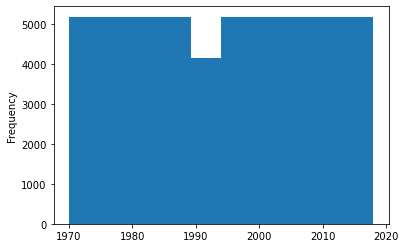

In [8]:
# check distribution of years
df['Year'].plot(kind='hist')

In [9]:
# check distribution of countries
df['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

<AxesSubplot:>

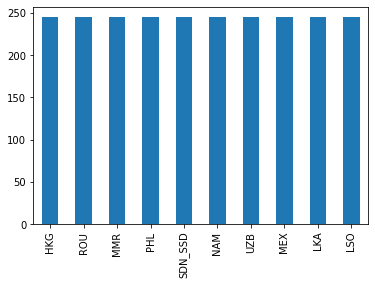

In [10]:
df['Code'].value_counts().nlargest(10).plot(kind='bar')

In [11]:
# ensure one to one mapping between country names and codes
print(df['Name'].nunique())
print(df['Code'].nunique())

210
210


In [12]:
# check sector value counts
df['Sector'].value_counts()

Transport                      10241
Other sectors                  10192
Power Industry                 10143
Buildings                      10094
Other industrial combustion    10094
Name: Sector, dtype: int64

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [13]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

df.columns

Index(['Code', 'Name', 'Sector', 'Year', 'Emissions'], dtype='object')

**Structure of the Edgar CO2 emissions dataset:** tabular data with individual observations in rows and variables in columns


Therefore, we do not necessarily need to change the way the data is stored. 

In [14]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


**Granularity of Edgar CO2 emissions dataset:** group-level over time 

In [15]:
print('(rows, columns):',(df.shape))
print('Number of countries in dataset:',(df['Code'].nunique()))

(rows, columns): (50764, 5)
Number of countries in dataset: 210


**Scope of Edgar CO2 emissions dataset:** According to Google and the ISO Country Code standards, there are 249 countries in the world with 194 of them being independent. Therefore, our data has a relatively large scope. Although we cannot definitively say that we can understand all CO2 emissions from every country using this data, the scope of our question is still relevant. 

In [16]:
print('Number of years:',(df['Year'].nunique()))
print('Start year:',(df['Year'][0]))
print('End year:',(df['Year'][len(df)-1]))

Number of years: 49
Start year: 1970
End year: 2018


**Temporality of Edgar CO2 emissions dataset:** We have data about CO2 emissions from 1970 to 2018 about 210 countries. 

**Faithfulness of Edgar CO2 emissions dataset:** Our data comes from EDGAR, the Emissions Database for Global Atmospheric Research. According to EDGAR's website, they provide independent emission data estimates regardless of what individual countries reported or by the UNFCCC, the United Nationals Framework Convention on Climate Change, using a consistent methodology. We can say that our data is accurate as each observation is not self-reported and is collected in a systematic fashion. 

In [40]:
# Checking if there is 49 observations for each country from each sector 
# grouping sectors to see if each has 49 observations 

all(df.groupby('Code').Sector.value_counts().eq(49))

True

<Figure size 1440x1440 with 0 Axes>

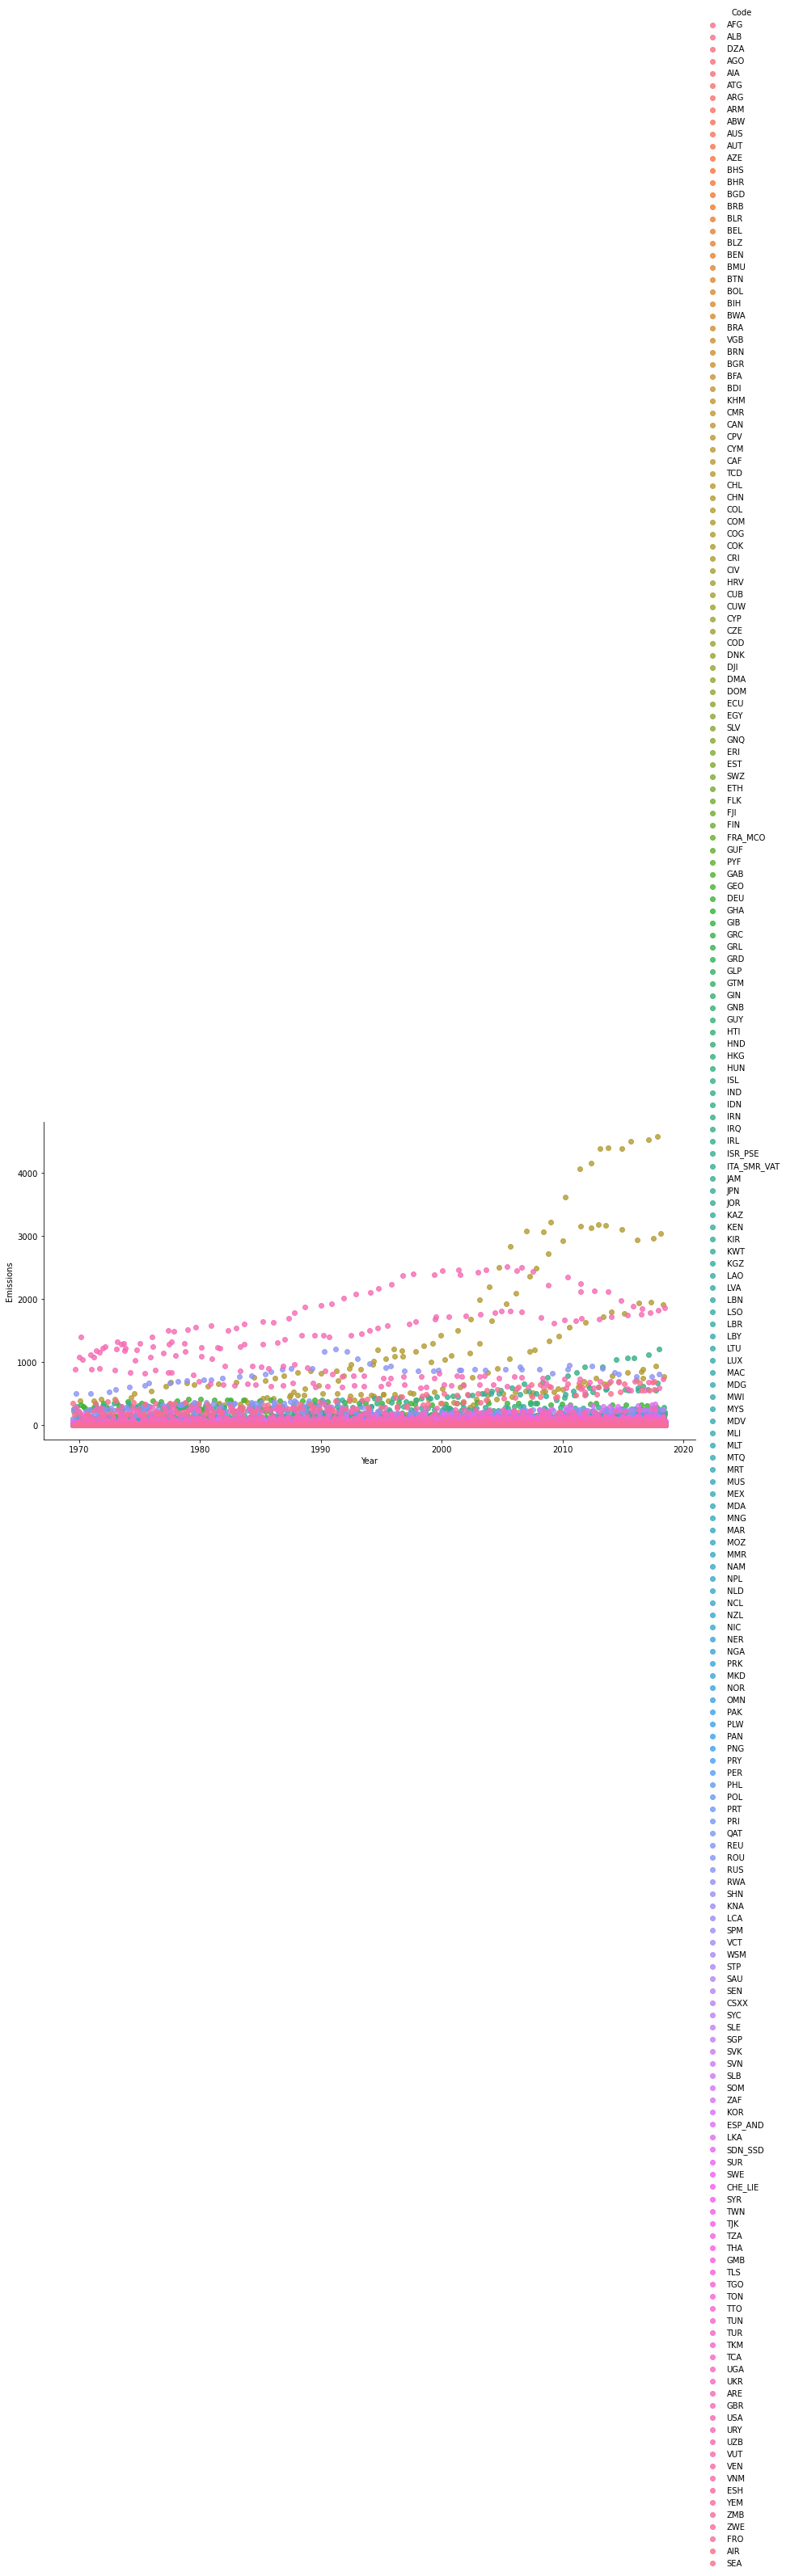

In [51]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=df,fit_reg=False, height=6, aspect=2, 
                x_jitter=.5, y_jitter=.5);
plt.show()

**Exploration of emissions among Countries:** It is clear from this plot that there is a great density of data which lies very low on this scale and relatively sparse data at the higher end, so we will break down our dataset into two groups accordingly.

In [51]:
#creating a dataframe of the countries with the highest emissions from 1970-2020 
#also creating a separate dataframe of countries with the very low emissions 
df_highest = df[df['Emissions'] >= 500]
df_lowest = df[df['Emissions'] <= 1]
df_highest, df_lowest

(      Code                    Name                       Sector  Year  \
 152    RUS                  Russia               Power Industry  1970   
 197    USA           United States               Power Industry  1970   
 403    USA           United States                    Buildings  1970   
 610    USA           United States                    Transport  1970   
 816    USA           United States  Other industrial combustion  1970   
 ...    ...                     ...                          ...   ...   
 50435  IND                   India  Other industrial combustion  2018   
 50544  USA           United States  Other industrial combustion  2018   
 50593  CHN                   China                Other sectors  2018   
 50762  AIR  International Aviation                    Transport  2018   
 50763  SEA  International Shipping                    Transport  2018   
 
          Emissions  
 152     508.338492  
 197    1079.968842  
 403     883.543122  
 610    1039.772133  


**Scope of lowest emissions dataframe:** This dataframe contains 25,436 instances of countries with emission levels of 1 or below in a given year, which is a substantially larger portion of the original dataset.

**Visualizing highest emissions data**

<Figure size 1440x1440 with 0 Axes>

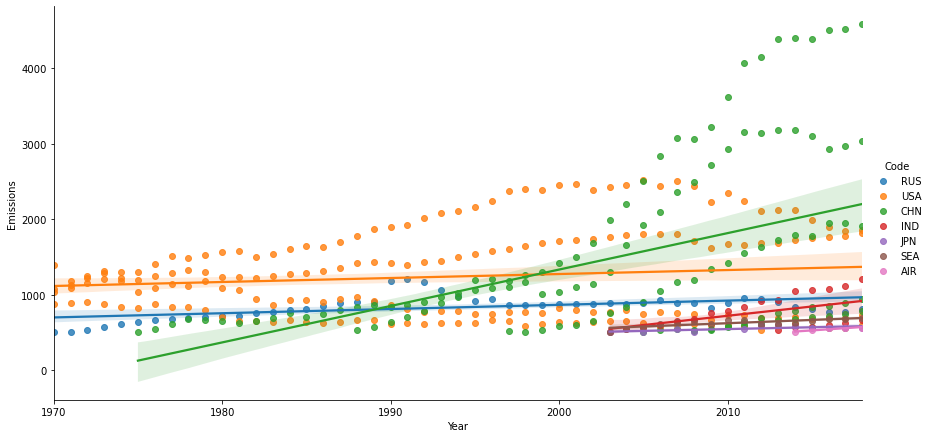

In [57]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=df_highest,fit_reg=True, height=6, aspect=2);
plt.show()

We can see that the overall trends for the majority of these highest emission countries are positive. In addition, we can see from out lmplot of the highest countries that there is an increase in the number of countries which break this 500 emissions barrier after 2000, perhaps indicating changes in environmental policy among those countries. 

In [58]:
df_highest.Name.unique()

array(['Russia', 'United States', 'China', 'India', 'Japan',
       'International Shipping', 'International Aviation'], dtype=object)

In [59]:
df_lowest.Name.nunique()

156

Our lowest emissions dataframe contains 156 countries which all have emission levels equal to or below 1, which is very low in relation to the highest emission countries, showing a clear discrepancy in global emissions among countries.